# Tổng quan chuỗi thời gian
# Cơ sở thống kê của dự báo

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sales = pd.read_csv("data/salesmonthly.csv")
sales.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


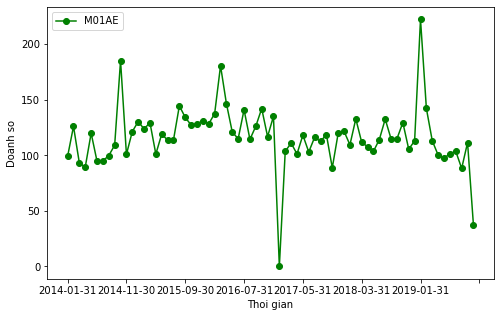

In [11]:
ax = sales.plot(x='datum', y='M01AE', color='green',style='-o', figsize = (8,5))
ax.set_xlabel("Thoi gian");
ax.set_ylabel("Doanh so");

# 
### BIểu đồ Histogram

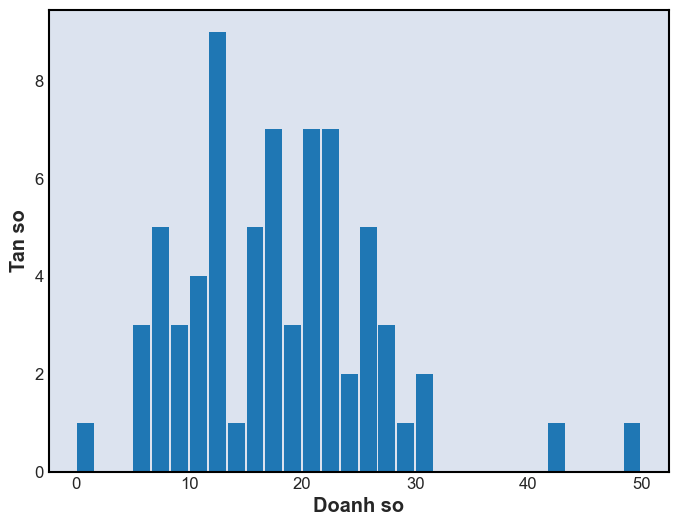

In [39]:
#bins: so khoang chia
#figsize: kích thước ảnh
ax = sales.N05C.hist(bins=30, rwidth=0.9, figsize = (8,6))
ax.set_xlabel("Doanh so")
ax.set_ylabel("Tan so")
ax.grid(False)
plt.show()

## 
## Vẽ biểu đồ nến

In [12]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
import datetime as dt
import pandas_datareader as web
import mplfinance as fplt

In [15]:
start = dt.datetime(2021,3,10)
end = dt.datetime.now()
df = web.DataReader(name='FPT', data_source='yahoo', start=start, end=end)
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-09,75700.0,74500.0,75000.0,75000.0,218240.0,75000.0
2021-03-10,77500.0,75000.0,75900.0,76300.0,260240.0,76300.0
2021-03-11,77100.0,76100.0,76500.0,76700.0,147780.0,76700.0
2021-03-12,77100.0,76300.0,77000.0,76500.0,206280.0,76500.0
2021-03-15,77500.0,76100.0,76600.0,76500.0,176090.0,76500.0
...,...,...,...,...,...,...
2021-09-13,94000.0,92900.0,93600.0,93000.0,1600000.0,93000.0
2021-09-14,94700.0,93000.0,93300.0,93800.0,2523200.0,93800.0
2021-09-15,94400.0,93300.0,93800.0,94100.0,1690100.0,94100.0


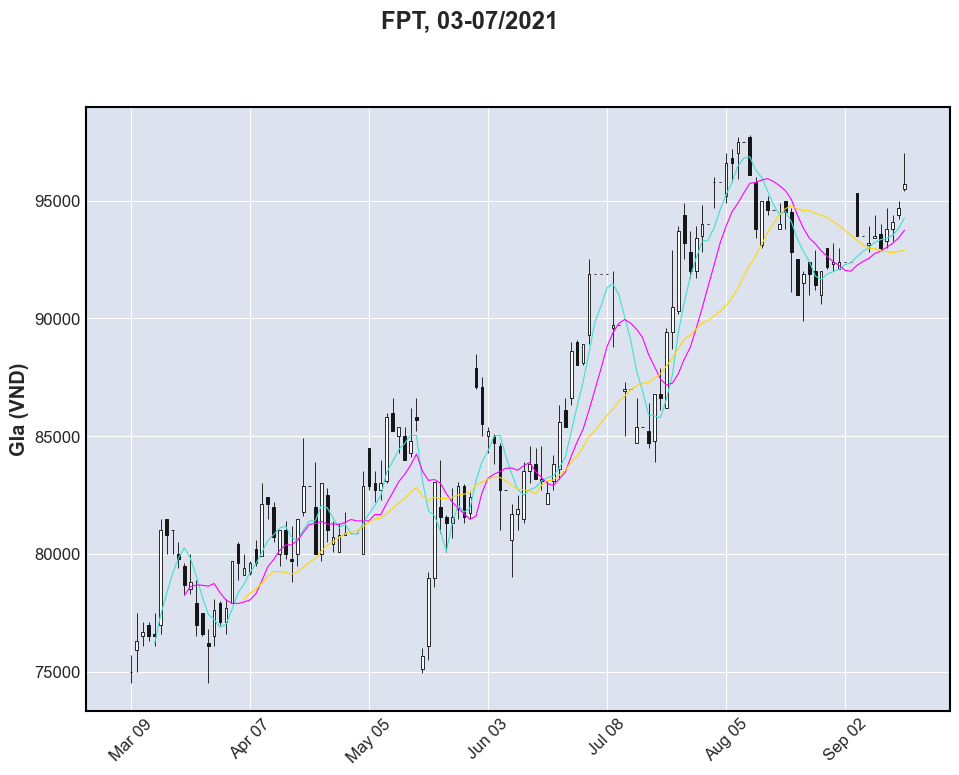

In [27]:
fplt.plot(df,
         type='candle',
         title='FPT, 03-07/2021',
        ylabel='GIa (VND)',
          figscale=1.5,
         mav = ( 5,10,20),
         )

## Vẽ biểu đồ phân tán của giá trị y(t) và y(t+1)

In [31]:

data = sales['M01AE'].values
#xen ke lan nhau
#Gia tri 0 den -1
x = data[:-1] 
#Gia tri tu 1 
y = data[1:]
# print(np.vstack([x,y]).T)

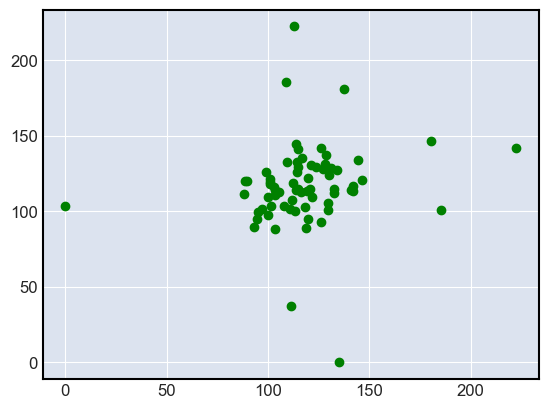

In [46]:
plt.scatter(x,y, color='green')
plt.show()

### Vẽ biểu đồ phân tán y(t) và y(t+5)

[[ 99.09   94.71 ]
 [126.05   95.01 ]
 [ 92.95   99.78 ]
 [ 89.475 109.094]
 [119.933 185.241]
 [ 94.71  100.86 ]
 [ 95.01  121.401]
 [ 99.78  130.349]
 [109.094 123.74 ]
 [185.241 129.386]
 [100.86  101.115]
 [121.401 119.117]
 [130.349 113.69 ]
 [123.74  113.81 ]
 [129.386 144.519]
 [101.115 134.122]
 [119.117 127.231]
 [113.69  128.233]
 [113.81  131.291]
 [144.519 128.402]
 [134.122 137.528]
 [127.231 180.589]
 [128.233 146.526]
 [131.291 120.861]
 [128.402 114.961]
 [137.528 141.019]
 [180.589 114.375]
 [146.526 126.218]
 [120.861 142.056]
 [114.961 116.85 ]
 [141.019 135.056]
 [114.375   0.   ]
 [126.218 103.517]
 [142.056 111.055]
 [116.85  101.215]
 [135.056 118.125]
 [  0.    103.006]
 [103.517 116.206]
 [111.055 112.47 ]
 [101.215 118.711]
 [118.125  88.737]
 [103.006 119.78 ]
 [116.206 121.663]
 [112.47  109.446]
 [118.711 132.804]
 [ 88.737 111.764]
 [119.78  107.723]
 [121.663 103.522]
 [109.446 114.226]
 [132.804 132.549]
 [111.764 114.719]
 [107.723 114.992]
 [103.522 12

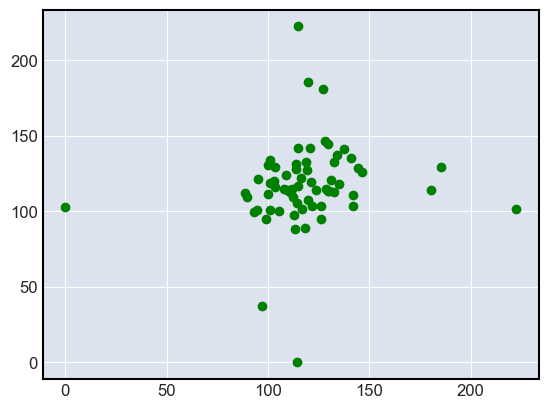

In [32]:
data = sales['M01AE'].values
#xen ke lan nhau
#Gia tri 0 den -1
x = data[:-5] 
#Gia tri tu 1 
y = data[5:]
print(np.vstack([x,y]).T)
plt.scatter(x,y, color='green')
plt.show()

###   
## Vẽ đường trung bình trượt MA5 cho doanh số bán 'M01AE'

In [48]:
# N là số quan sát
N = 5;
y = sales['M01AE'].values
# tinh
ma5 = np.array([y[t-4:t].mean() for t in range(4, len(y))]);
ma5

array([101.89125, 107.102  ,  99.267  ,  99.782  , 102.35825,  99.6485 ,
       122.28125, 123.74375, 129.149  , 134.46275, 119.0875 , 126.219  ,
       121.1475 , 118.3395 , 115.827  , 111.933  , 122.784  , 126.53525,
       129.9205 , 133.52625, 130.21925, 128.78925, 131.3635 , 144.4525 ,
       148.26125, 146.376  , 140.73425, 130.84175, 122.804  , 124.14325,
       130.917  , 124.87475, 130.045  ,  98.4905 ,  88.85575,  87.407  ,
        78.94675, 108.478  , 108.35025, 109.638  , 112.45175, 112.59825,
       109.031  , 109.9245 , 112.22275, 109.9065 , 120.92325, 118.91925,
       115.43425, 113.95325, 109.30875, 114.505  , 116.254  , 119.1215 ,
       122.915  , 116.1495 , 115.72575, 142.5655 , 145.75425, 147.662  ,
       144.44725, 113.174  , 103.042  , 100.64775,  97.67375, 101.2185 ])

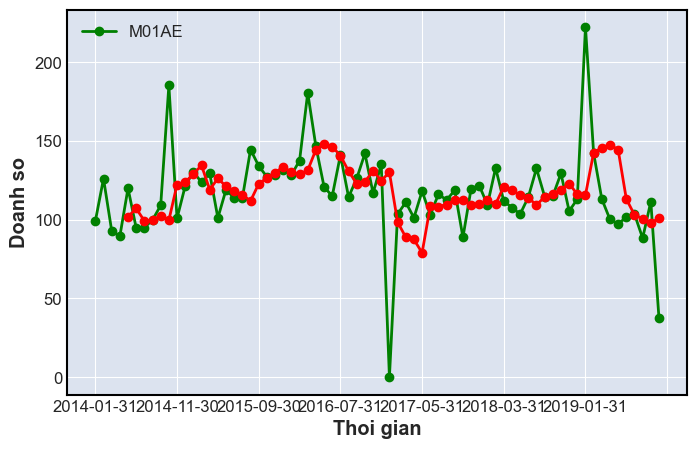

In [53]:
# vẽ đồ thị
x = np.arange(0, len(y));
ax2 = sales.plot(x='datum', y='M01AE', color='green',style='-o', figsize=(8,5))
ax2.set_xlabel('Thoi gian');
ax2.set_ylabel('Doanh so');
plt.plot(x[4:],ma5,'-ro')
plt.show()

# 
#  
## Tính hàm tự tương quan ACF

In [64]:
y = sales['M01AE'].values
T = len(y)
K = T//4
ytb = y.mean();
ACF = np.ones(K+1)
c0 = np.sum((y-ytb)**2)/T
for k in range(1,K+1):
    ck = np.sum((y-ytb)[:T-k]*(y-ytb)[k:])/T
    rk = ACF[k] = ck/c0
ACF


array([ 1.        ,  0.13753237,  0.10313133,  0.08650069,  0.00343518,
        0.12218967, -0.02867395,  0.03628749, -0.02715942, -0.21089774,
       -0.11935216, -0.00545069, -0.04342383, -0.04625789,  0.02588892,
       -0.10250137, -0.02705678, -0.02568797])

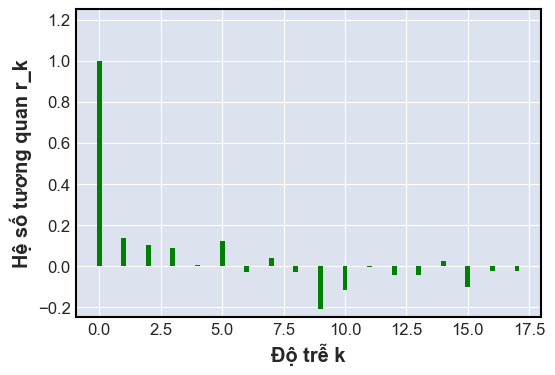

In [70]:
# Vẽ đồ thị thanh
fig = plt.figure(figsize = (6,4));
x = np.arange(K+1)
plt.bar(x, ACF, color='green', width=0.2)
plt.xlabel("Độ trễ k")
plt.ylabel("Hệ số tương quan r_k")
plt.ylim([-0.25,1.25])
plt.show()
#Sử dụng biểu đồ này để đánh giá chuỗi thời gian được sinh ra bởi quá trình nào đó
# Dựa vào đặc điểm của hàm ACF đánh giá dạng của chuỗi thời gian
#CHo thấy rằng chuỗi này là chuỗi dừng, đưa ra các mô hình tương ứng để dự báo
# CHỉ biểu diễn được trên đoạn (+-1)

## 
## Biến đổi và hiệu chỉnh dữ liệu

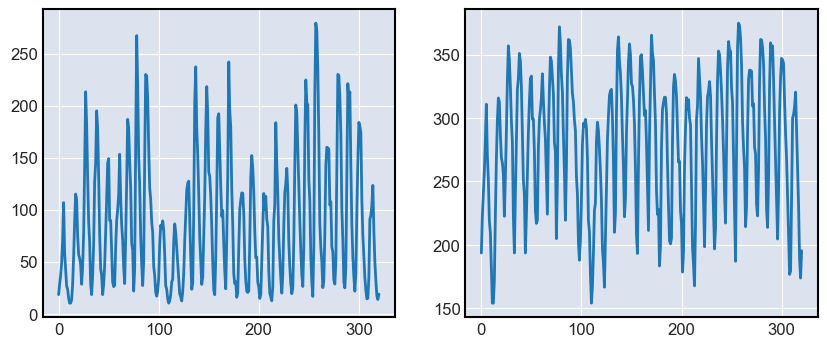

In [83]:
# Biến đổi logarit của dữ liệu số vết đen mặt trời
sunspot = pd.read_excel('data/sunspot.xls')
y = sunspot['Total sunspot number'].values + 10
T = len(y)
ydot = np.exp(1/T*np.sum(np.log(y))) # tínht trung bình nhân
y_ln = ydot*np.log(y) # biến đổi logarit của dữ liệu

# Vẽ đồ thị
fig, ax = plt.subplots(1,2,figsize = (10,4))
x = np.arange(T)
ax[0].plot(x,y)
ax[1].plot(x,y_ln)
plt.show()


In [84]:
# hiệu chỉnh xu thế bằng hồi quy
wine = pd.read_csv('data/wineconsumption.csv')
wine 

,Year,Liters per capita
0,1836,1.1
1,1837,1.2
2,1838,1.1
3,1839,1.2
4,1840,1.2
...,...,...
177,2014,17.2
178,2015,20.9
179,2016,21.2
180,2017,20.7


In [88]:
#Xây dựng đường xu thế tuyến tính
from sklearn.linear_model import LinearRegression

y = wine['Liters per capita'].values
x = np.arange(len(y)) + 1957
model = LinearRegression(fit_intercept = True)
X = x[:, np.newaxis]
model.fit(X,y)
print("Mô hình: y=%f+%f x"%(model.intercept_, model.coef_[0]))



Mô hình: y=-154.151721+0.077416 x


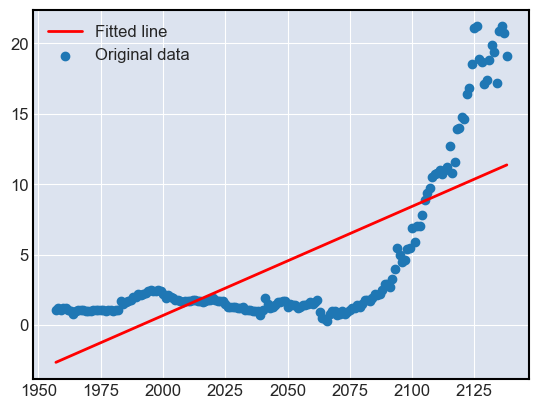

In [89]:
# Vẽ đồ thị
yfit = model.predict(X)
plt.scatter(x,y,label='Original data')
plt.plot(x,yfit,'r', label='Fitted line')
plt.legend()
plt.show()


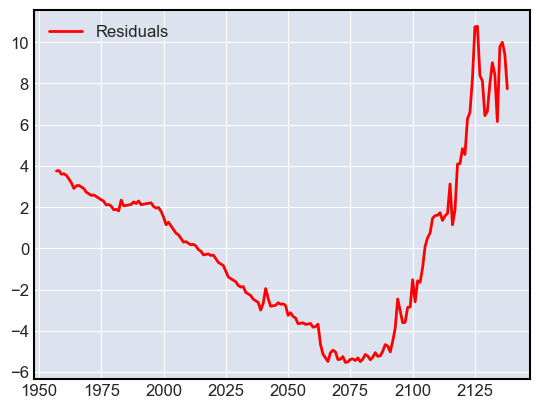

In [91]:
# PHần dư
#y quan sát - y ước lượng
y_residuals = y - yfit
plt.plot(x,y_residuals, 'r', label='Residuals')
plt.legend()
plt.show()

In [94]:
# Loại bỏ xu thế bằng cách lấy sai phân
#Diff(): mặc định lấy giá trị dưới trừ giá trị trên
wine['difference'] = wine['Liters per capita'].diff()
wine

,Year,Liters per capita,difference
0,1836,1.1,NaN
1,1837,1.2,0.1
2,1838,1.1,-0.1
3,1839,1.2,0.1
4,1840,1.2,0.0
...,...,...,...
177,2014,17.2,-2.2
178,2015,20.9,3.7
179,2016,21.2,0.3
180,2017,20.7,-0.5


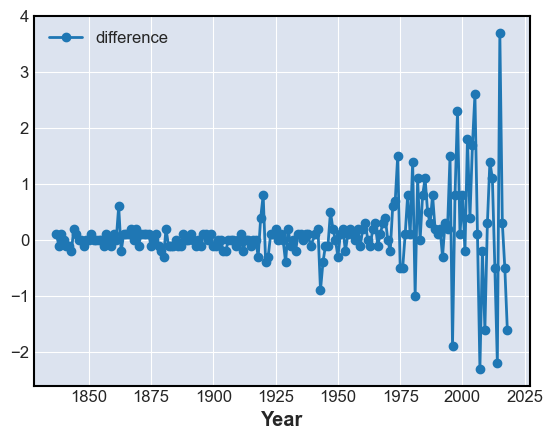

In [107]:
wine.plot(x='Year',y='difference',style='-o',label ='difference');
plt.legend();
plt.show();

In [120]:
# Loại bỏ thành phần mùa và xu thế
sale = pd.read_csv('data/beveragesales.csv')
sale['season'] = sale['RETAILSALES'].diff(periods=12)
sale['season+trend'] = sale['season'].diff()
sale

,DATE,RETAILSALES,season,season+trend
0,1992-01-01,1509,NaN,NaN
1,1992-02-01,1541,NaN,NaN
2,1992-03-01,1597,NaN,NaN
3,1992-04-01,1675,NaN,NaN
4,1992-05-01,1822,NaN,NaN
...,...,...,...,...
346,2020-11-01,5796,739.0,-351.0
347,2020-12-01,7366,1040.0,301.0
348,2021-01-01,5087,899.0,-141.0
349,2021-02-01,4974,656.0,-243.0


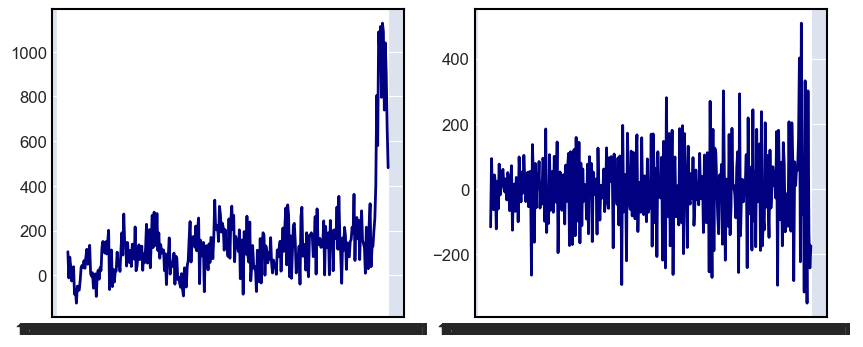

In [119]:
# Vẽ đồ thị
fig, ax = plt.subplots(1,2,figsize = (10,4))
ax[0].plot(sale['DATE'], sale['season'], color='navy')
ax[1].plot(sale['DATE'], sale['season+trend'], color='navy')
plt.show()


# 
#  
## Nhắc lại về hồi quy tuyến tính nhiều biến

In [3]:
df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [15]:
# Mấu quan sát
x = df['YearsExperience'].values
y = df['Salary'].values

# Ước lượng tham số mô hình hồi quy tuyến tính
n = len(x)
X = np.vstack([np.ones(n),x]).T
Y = y[:, np.newaxis]

beta = np.linalg.inv(X.T@X)@X.T@Y
print('Tham số của mô hình:', beta)

#Sai số tiêu chuẩn ước lượng
e = Y - X@beta

SSE = e.T@e

var = SSE/(n-2)
print(var)
se_beta = np.sqrt(var*np.diag(np.linalg.inv(X.T@X)))
 
print('Sai số tiêu chuẩn của beta[0]',se_beta[0,0])
print('Sai số tiêu chuẩn của beta[1]',se_beta[0,1])



Tham số của mô hình: [[25792.20019867]
 [ 9449.96232146]]
[[33504591.13101533]]
SE [[2273.05343258  378.75457424]]
Sai số tiêu chuẩn của beta[0] 2273.0534325816056
Sai số tiêu chuẩn của beta[1] 378.7545742388212


### Kiểm định tham số $\beta_j = 0$ ?
Với độ tin cậy 95%, $\widehat{\beta}_j$ nằm trong khoảng tin cậy: $0 \pm 2*se(\widehat{\beta}_j$ ($2\approx 1.96$)

=> Quy tắc: Nếu $|\widehat{\beta}_j|>2*se(\widehat{\beta}_j)$ thì có nghĩa là $\beta_j \neq 0$ và ngược lại.

## 
### Mô hình hồi quy đo lường sự hài lòng 

In [17]:
df = pd.read_excel('data/satisfaction.xlsx')
df

,Quan sát,Tuổi,Bệnh,Hài lòng
0,1,55,50,68
1,2,46,24,77
2,3,30,46,96
3,4,35,48,80
4,5,59,58,43
5,6,61,60,44
6,7,74,65,26
7,8,38,42,88
8,9,27,42,75
9,10,51,50,57


In [19]:
from sklearn.linear_model import LinearRegression

x1 = df['Tuổi'].values
x2 = df['Bệnh'].values
y = df['Hài lòng'].values
n = len(y)

model = LinearRegression(fit_intercept=False)
X = np.vstack([np.ones(n), x1,x2]).T
model.fit(X,y)
print("Tham số mô hình", model.coef_)



Tham số mô hình [143.47201181  -1.03105341  -0.55603781]


In [22]:
#Làm theo cách thủ công không dùng thư viện sklearn

# Mẫu quan sát
x1 = df['Tuổi'].values
x2 = df['Bệnh'].values
y = df['Hài lòng'].values
n = len(y)

#Uớc lượng tham số mô hình hồi quy tuyến tính

X = np.vstack([np.ones(n),x1,x2]).T
Y = y[:, np.newaxis]
beta = np.linalg.inv(X.T@X)@X.T@Y
print("Tham số mô hình:", beta)

# Sai số tiêu chuẩn ước lượng
e = Y - X@beta
SSE = e.T@e
var = SSE/(n-3)
print(var)

se_beta = np.sqrt(var*np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn ước lượng", se_beta)



Tham số mô hình: [[143.47201181]
 [ -1.03105341]
 [ -0.55603781]]
[[50.66117952]]
Sai số tiêu chuẩn ước lượng [[5.95483794 0.11561116 0.13141027]]


In [24]:
# Sai số tiêu chuẩn ước lượng cách 2 dựa vào sklearn
e = y - model.predict(X)
SSE = np.sum(e**2)
var = SSE/(n-3)
print("sigma^2 =", var)
se_beta = np.sqrt(var*np.diag(np.linalg.inv(X.T@X)))
print("Sai số tiêu chuẩn ước lượng", se_beta)


sigma^2 = 50.66117951930046
Sai số tiêu chuẩn ước lượng [5.95483794 0.11561116 0.13141027]
